## Importing necessary libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Loading Data

In [ ]:
filenames = os.listdir('.')
filenames

['.config',
 'August_2019.csv',
 'January_2019.csv',
 'May_2019.csv',
 'December_2019.csv',
 'October_2019.csv',
 'June_2019.csv',
 'September_2019.csv',
 'November_2019.csv',
 'July_2019.csv',
 'February_2019.csv',
 'April_2019.csv',
 'sample_data']

In [ ]:
All_data = pd.DataFrame()
for file in filenames:
  # Check if the file is a CSV before reading
  if file.endswith('.csv'):
    df = pd.read_csv(file)
    All_data = pd.concat([All_data , df])

In [ ]:
data = All_data
data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
15365,208720,Wired Headphones,1,11.99,05/16/19 09:56,"114 13th St, Austin, TX 73301"
11754,221135,Wired Headphones,1,11.99,06/18/19 17:47,"739 West St, Seattle, WA 98101"
372,150860,AAA Batteries (4-pack),3,2.99,02/21/19 18:45,"90 Sunset St, New York City, NY 10001"
550,259882,Wired Headphones,1,11.99,10/17/19 12:04,"525 Center St, New York City, NY 10001"
14989,208361,Apple Airpods Headphones,1,150,05/21/19 15:53,"702 Madison St, San Francisco, CA 94016"


In [ ]:
data.shape

(171624, 6)

We have 186850 Rows , let's Check Duplicates and Missing Values & Dtypes

# Data Processing

In [ ]:
# do we have missing values?
data.isna().sum()

,0
Order ID,508
Product,508
Quantity Ordered,508
Price Each,508
Order Date,508
Purchase Address,508


In [ ]:
data[data.isna().any(axis = 1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
312,NaN,NaN,NaN,NaN,NaN,NaN
1222,NaN,NaN,NaN,NaN,NaN,NaN
2648,NaN,NaN,NaN,NaN,NaN,NaN
2685,NaN,NaN,NaN,NaN,NaN,NaN
3119,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
16763,NaN,NaN,NaN,NaN,NaN,NaN
16912,NaN,NaN,NaN,NaN,NaN,NaN
17060,NaN,NaN,NaN,NaN,NaN,NaN
17446,NaN,NaN,NaN,NaN,NaN,NaN


**we have 545 rows Nan Data**



---



In [ ]:
data.dropna(axis= 0, inplace = True)

In [ ]:
data.isna().sum()

,0
Order ID,508
Product,508
Quantity Ordered,508
Price Each,508
Order Date,508
Purchase Address,508


**Now our Data Clean from Nan Values**

In [ ]:
# do we have duplicates?
data.duplicated().sum()

264

In [ ]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**All columns are in Object format let's convert the comlumns that need to convert**

In [ ]:
print(data['Quantity Ordered'].unique())


['2' '1' '3' '4' 'Quantity Ordered' nan '6' '7' '5' '8' '9']


**"We cannot convert `Quantity Ordered` to an integer because it contains string values such as `Quantity Ordered`."**

---
we can convert this string values to avg of the Quantity Ordered

In [ ]:
filter = data[data['Quantity Ordered'] != 'Quantity Ordered']

In [ ]:
filter = filter.dropna(subset=['Quantity Ordered']).copy()
filter.loc[:, 'Quantity Ordered'] = filter['Quantity Ordered'].astype(int)

In [ ]:
avg_quantity_ordered = round(filter['Quantity Ordered'].mean())

In [ ]:
data['Quantity Ordered'] = data['Quantity Ordered'].replace('Quantity Ordered' ,avg_quantity_ordered )

In [ ]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'], errors='coerce')
data['Quantity Ordered'] = data['Quantity Ordered'].fillna(0).astype(int)

**we finished from Quantity Ordered and it's clean now let's discove the other columns**

*   we notice that Price column is also object so let's convert it










In [ ]:
len(data[data['Price Each']=='Price Each'])

320

we have 355 row that have a string value in Price Column , let's convert them to the avg of price.  
note : it's not the best decision but we suppose the avg price is good for this case

In [ ]:
filter2 = data[data['Price Each'] != 'Price Each']
filter2['Price Each'] = filter2['Price Each'].astype(float);
avg_price = round(filter2['Price Each'].mean())
data['Price Each'] = data['Price Each'].replace('Price Each' ,avg_price )
data['Price Each'] = data['Price Each'].astype(float)

/tmp/ipython-input-2410401160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter2['Price Each'] = filter2['Price Each'].astype(float);


**Convert Order Date datatype to datetime**

In [ ]:
# data = data[data['Order Date'] != 'Order Date']

In [ ]:
data = data[data['Order Date'] != 'Order Date'].copy()
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%y %H:%M')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 12035
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


"Now our column data types have been successfully converted."






## Feature Engineering

we have 'Quantity Ordered' & Price for each unit so let's calculate the column total

In [ ]:
data['Total'] = data['Quantity Ordered'] * data['Price Each']


/tmp/ipython-input-1845440342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Total'] = data['Quantity Ordered'] * data['Price Each']


also we can drive other columns from the order date like : order day and Month

In [ ]:
data['day'] = data['Order Date'].dt.day_name()
data['month'] = data['Order Date'].dt.month_name()
data['hour'] = data['Order Date'].dt.hour

/tmp/ipython-input-3816521141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['Order Date'].dt.day_name()
/tmp/ipython-input-3816521141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['Order Date'].dt.month_name()
/tmp/ipython-input-3816521141.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

we can benefit from Purchase Address by splitting it and get the cities names

In [ ]:
data[['Street Address', 'City', 'State ZIP']] = data['Purchase Address'].str.split(', ', expand=True)

/tmp/ipython-input-1642681354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Street Address', 'City', 'State ZIP']] = data['Purchase Address'].str.split(', ', expand=True)
/tmp/ipython-input-1642681354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Street Address', 'City', 'State ZIP']] = data['Purchase Address'].str.split(', ', expand=True)
/tmp/ipython-input-1642681354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

In [ ]:
data[['State' , 'Zip']] = data['State ZIP'].str.split(' ',expand = True)

/tmp/ipython-input-3517568117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['State' , 'Zip']] = data['State ZIP'].str.split(' ',expand = True)
/tmp/ipython-input-3517568117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['State' , 'Zip']] = data['State ZIP'].str.split(' ',expand = True)


**now we don't need theses columns : Purchase Address	& State ZIP**

In [ ]:
data.drop(['Purchase Address' , 'State ZIP'] , axis = 1 ,inplace = True)

/tmp/ipython-input-2519871742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Purchase Address' , 'State ZIP'] , axis = 1 ,inplace = True)


In [ ]:
data = data.sort_values(by='Order Date' )
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total,day,month,hour,Street Address,City,State,Zip
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,11.99,Tuesday,January,3.0,9 Lake St,New York City,NY,10001
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,11.95,Tuesday,January,3.0,760 Church St,San Francisco,CA,94016
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,150.00,Tuesday,January,4.0,735 5th St,New York City,NY,10001
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,2.99,Tuesday,January,5.0,75 Jackson St,Dallas,TX,75001
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,23.90,Tuesday,January,6.0,943 2nd St,Atlanta,GA,30301


**Our Cities**

In [ ]:
data['City'].unique()

array(['New York City', 'San Francisco', 'Dallas', 'Atlanta', 'Boston',
       'Seattle', 'Los Angeles', 'Portland', 'Austin', nan], dtype=object)

# EDA

# Sales Analysis:



## best month for sales ?

In [ ]:
monthly_sales  = data.groupby(['month'] , as_index = False)['Total'].sum()
monthly_sales

,month,Total
0,April,3385499.82
1,August,2244467.88
2,December,4613443.34
3,February,2202022.42
4,January,1822256.73
5,July,2647775.76
6,June,2577802.26
7,March,3207.50
8,May,3152606.75
9,November,3199603.20


*Sorting monthly_sales by Month*

In [ ]:
month_dict = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
monthly_sales.sort_values('month' , key = lambda x : x.apply(lambda y : month_dict[y]) , inplace = True)

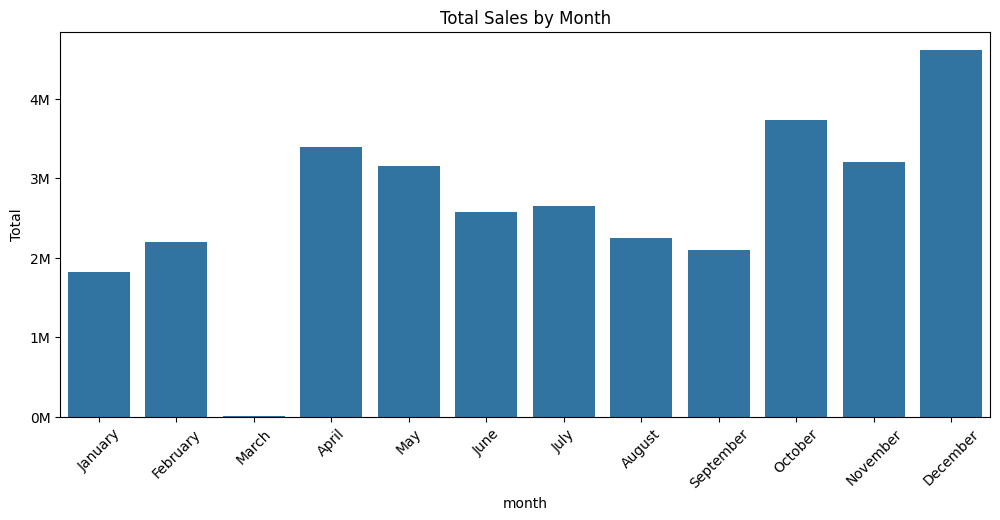

In [ ]:
import matplotlib.ticker as mtick
plt.figure(figsize=(12 , 5))
ax = sns.barplot(data = monthly_sales , x = 'month' , y = 'Total')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M'))
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.show()


**month (December) is the highest sales in 2019 with approximately $4,810,000.**


---



 ## What day of the week has the highest sales?


In [ ]:
day_data = data.groupby(['month' , 'day'],as_index = False).agg({'Total' : 'sum',
                                     'Order ID':'count'
                                     })

In [ ]:
day_dict = {
    'Saturday': 1, 'Sunday': 2, 'Monday': 3, 'Thursday': 4, 'Wednesday': 5, 'Tuesday': 6,
    'Friday': 7
}

day_data['month'] = pd.Categorical(day_data['month'], categories=month_dict, ordered=True)
day_data['day'] = pd.Categorical(day_data['day'], categories=day_dict, ordered=True)
day_data.sort_values(by=['month', 'day'], inplace=True)

In [ ]:
day_data_order = day_data.pivot_table(index = 'month' , values = 'Order ID',columns='day' )

/tmp/ipython-input-3061078581.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_data_order = day_data.pivot_table(index = 'month' , values = 'Order ID',columns='day' )


<Axes: xlabel='month', ylabel='Count of Orders'>

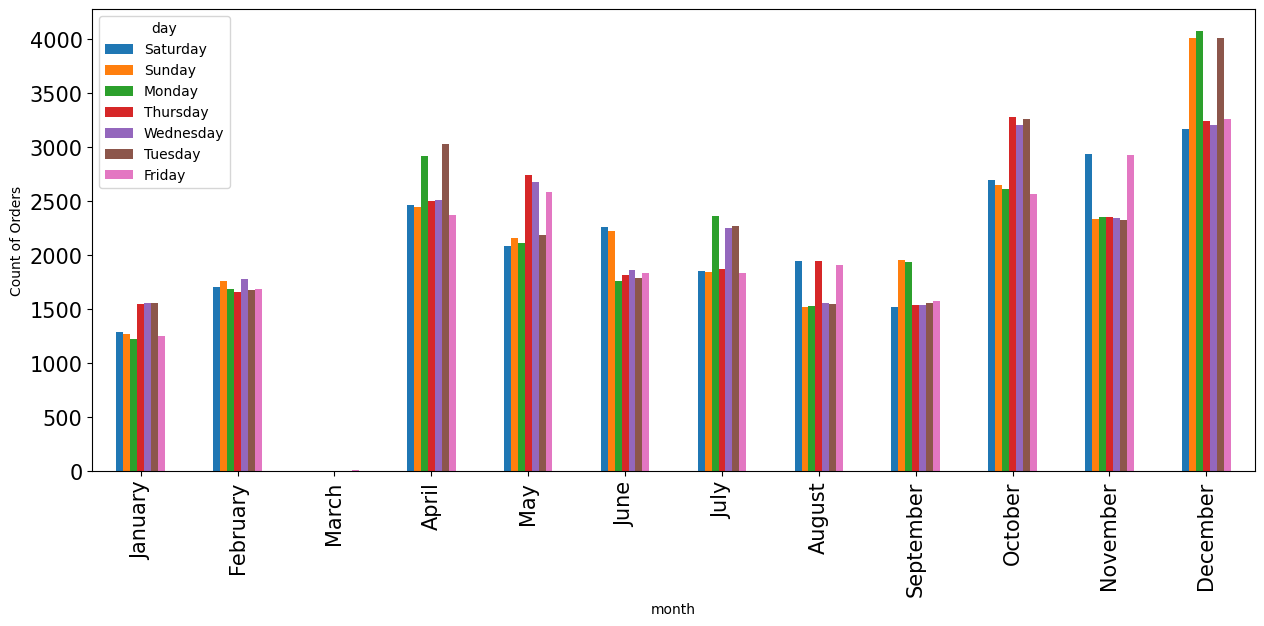

In [ ]:
day_data_order.plot(kind = 'bar',figsize = (15 , 6) , fontsize = 15,ylabel = "Count of Orders")

## Timline of day of the week VS Revenue ?

In [ ]:
day_data_Total = day_data.pivot_table(index = 'month' , values = 'Total',columns='day' )

/tmp/ipython-input-652927038.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  day_data_Total = day_data.pivot_table(index = 'month' , values = 'Total',columns='day' )


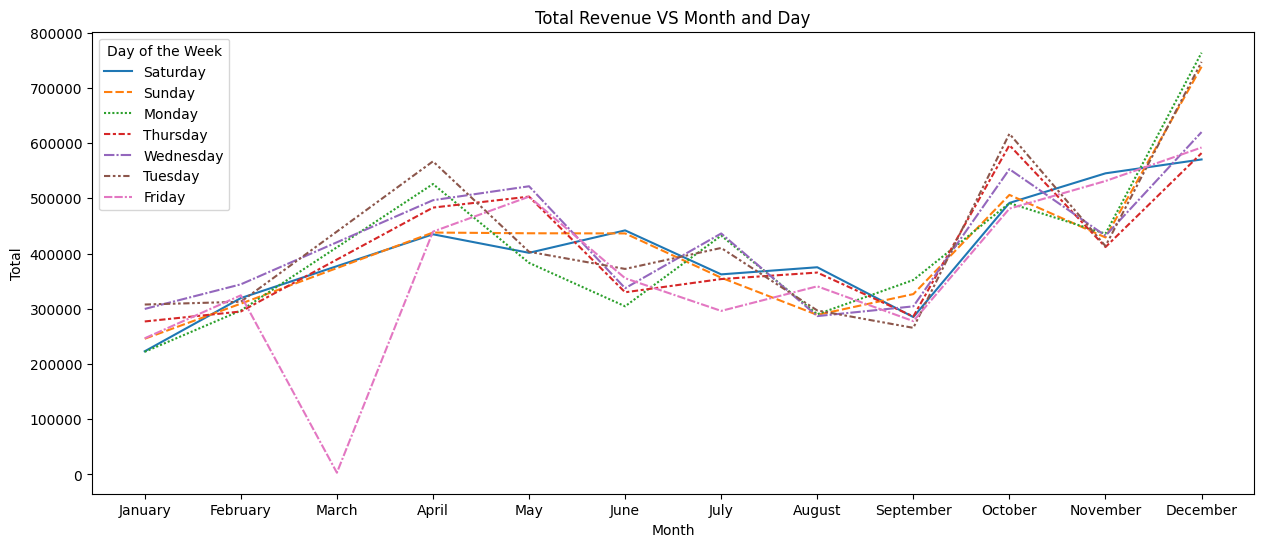

In [ ]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=day_data_Total)
plt.title('Total Revenue VS Month and Day')
plt.xlabel('Month')
plt.ylabel('Total')
plt.legend(title='Day of the Week', loc='upper left')
plt.show()

## Sales Per Hour ?

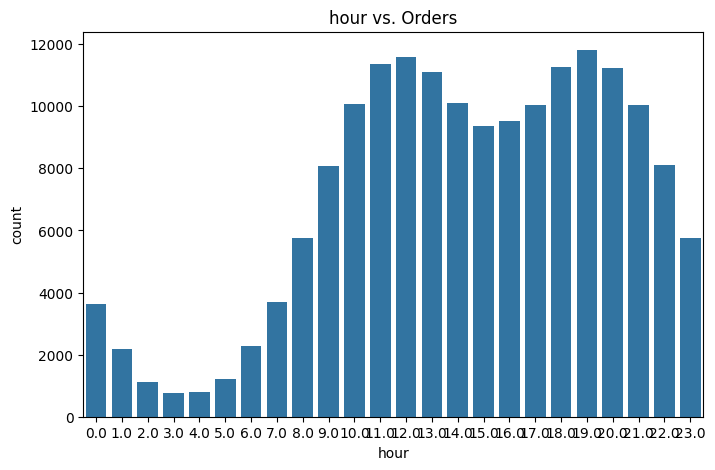

In [ ]:
data = data.reset_index(drop=True)
plt.figure(figsize=(8,5))
plt.title('hour vs. Orders')
sns.countplot(x='hour', data=data);

# Product Analysis:


## What product sold the most?

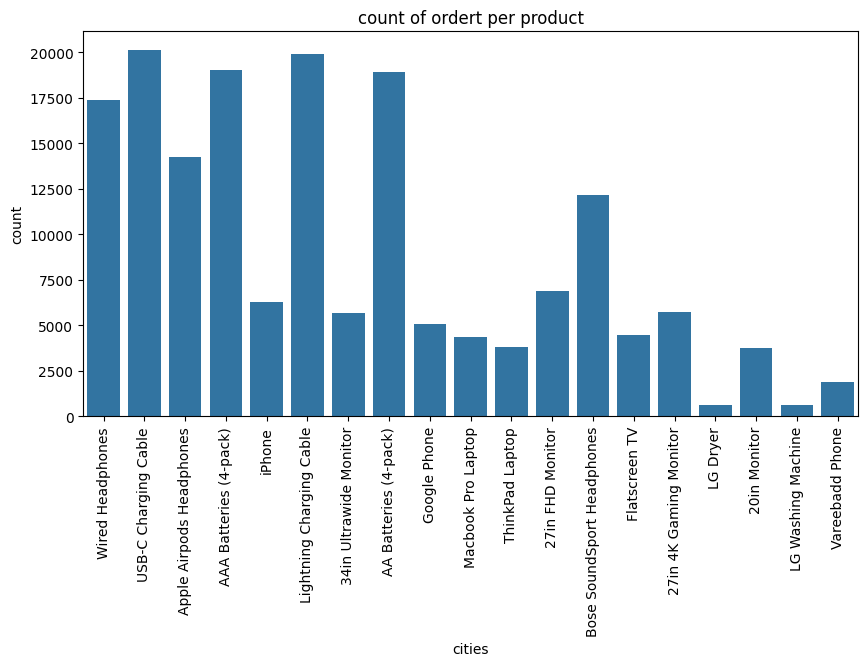

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Product' , data = data)
plt.xticks(rotation=90)
plt.xlabel('cities')
plt.title('count of ordert per product')
plt.show()

## Top Products for each City

In [ ]:
Cities_Products = data.groupby(['City' , 'Product'] , as_index=False).agg({'Quantity Ordered' : 'sum' ,
                                            'Total':'sum'
                                            })
Cities_Products.rename(columns = {'Quantity Ordered':'orders_count'},inplace = True)

In [ ]:
def get_top_products(group):
    return group.nlargest(5, 'orders_count')

Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)

/tmp/ipython-input-1572348687.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)


In [ ]:
x = Cities_Products.pivot_table(index = 'City' , values ='orders_count',columns = 'Product' )

Text(0.5, 1.0, 'Top 5 Products for each City')

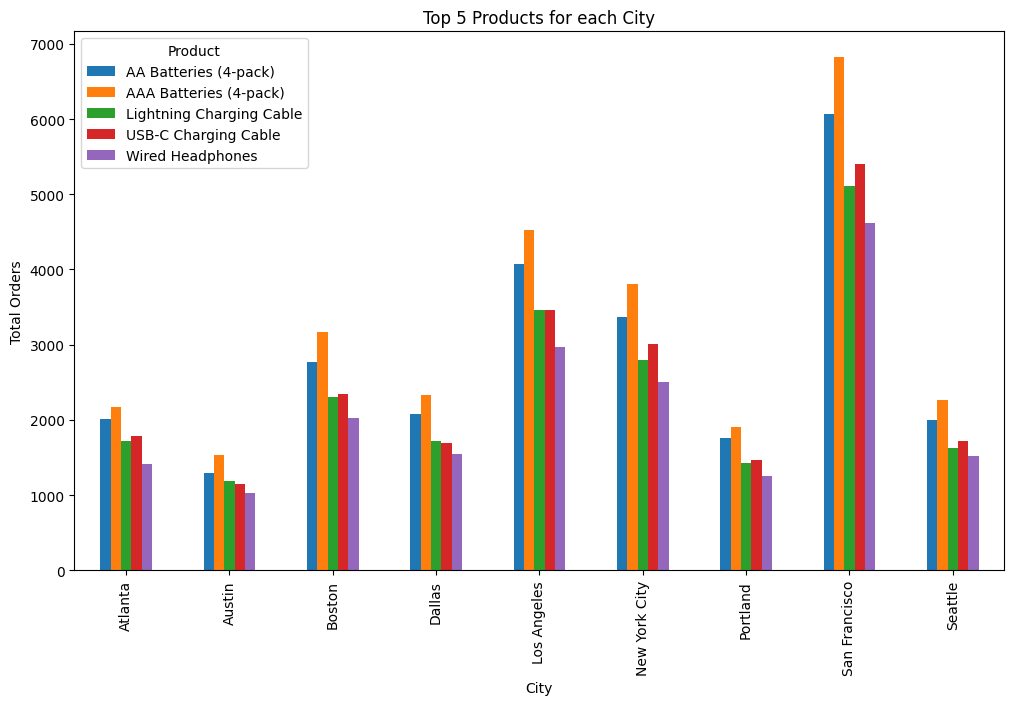

In [ ]:
x.plot(kind = 'bar' , figsize=(12,7))
plt.ylabel('Total Orders')
plt.title("Top 5 Products for each City")

## Top 5 Product With Highest Revenue for each City

In [ ]:
def get_top_products(group):
    return group.nlargest(5, 'Total')
Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)

/tmp/ipython-input-3874726740.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  Cities_Products = Cities_Products.groupby(['City'] , group_keys = False).apply(get_top_products)


Text(0.5, 1.0, 'Top 5 Products VS Revenue')

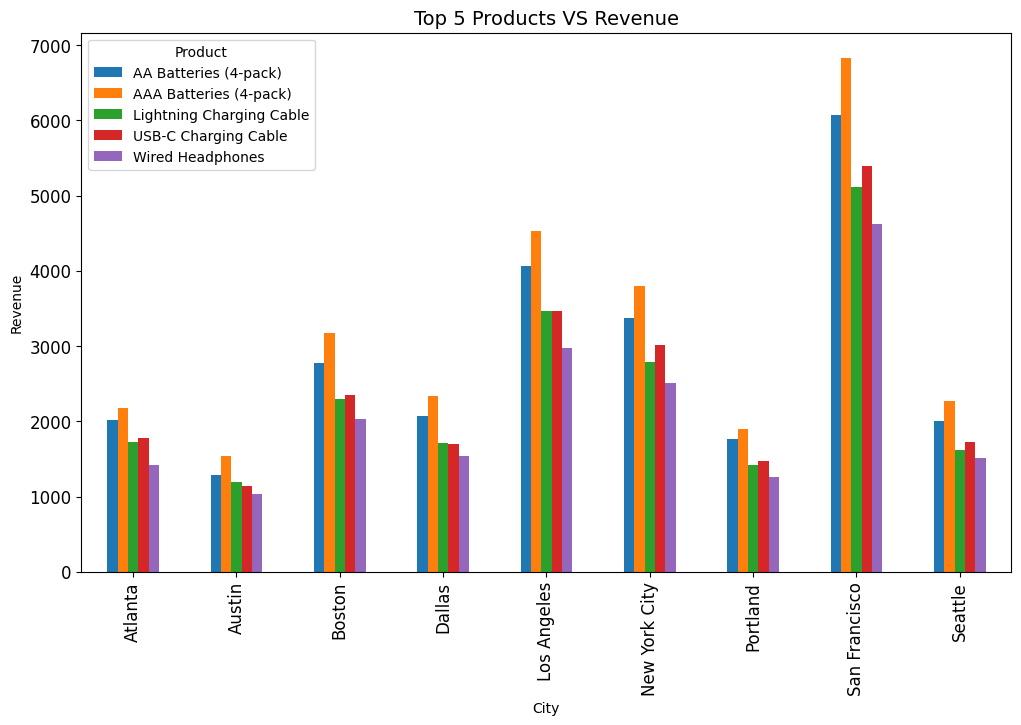

In [ ]:
x.plot(kind = 'bar' , figsize=(12,7) , fontsize = 12)
plt.ylabel('Revenue')
plt.title("Top 5 Products VS Revenue" , fontsize = 14)

## What products are most often sold together ?

In [ ]:
import collections
orders_dict = collections.defaultdict(int)

In [ ]:
ndata = data
ndata.reset_index(inplace = True)

In [ ]:
order = ndata.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [ ]:
x = order.str.split(',')

In [ ]:
def combination(orders , length):
  lst = []
  def resc(indx ,path):
    if len(path) == 2:
      lst.append(path)
      return
    if indx == length:
      return

    resc(indx+1 , [orders[indx]]+path)
    resc(indx+1 , path)

  resc(0 , [])
  return lst

In [ ]:
for product in x.dropna():
  length =  len(product)
  if length == 2:
    orders_dict[tuple(sorted(product))]+=1
  elif length > 2:
    res = combination(product , length)
    for pair1 , pair2 in res:
      orders_dict[tuple(sorted([pair1 , pair2]))]+=1

In [ ]:
most_common_items = sorted(orders_dict.items() , key = lambda x : x[1] , reverse = True)[:10]

for Orders,count in most_common_items:
  print(Orders,count)

('Lightning Charging Cable', 'iPhone') 3948
('Google Phone', 'USB-C Charging Cable') 3916
('Wired Headphones', 'iPhone') 1922
('Google Phone', 'Wired Headphones') 1826
('Apple Airpods Headphones', 'iPhone') 1536
('USB-C Charging Cable', 'Vareebadd Phone') 1470
('USB-C Charging Cable', 'Wired Headphones') 1034
('Bose SoundSport Headphones', 'Google Phone') 932
('Vareebadd Phone', 'Wired Headphones') 618
('Lightning Charging Cable', 'Wired Headphones') 600


## What percentage of orders include multiple products (more than one item) ?


In [ ]:
Products = data.groupby('Order ID')['Product'].count()
Products = Products.value_counts()
Products = Products.nlargest(3)

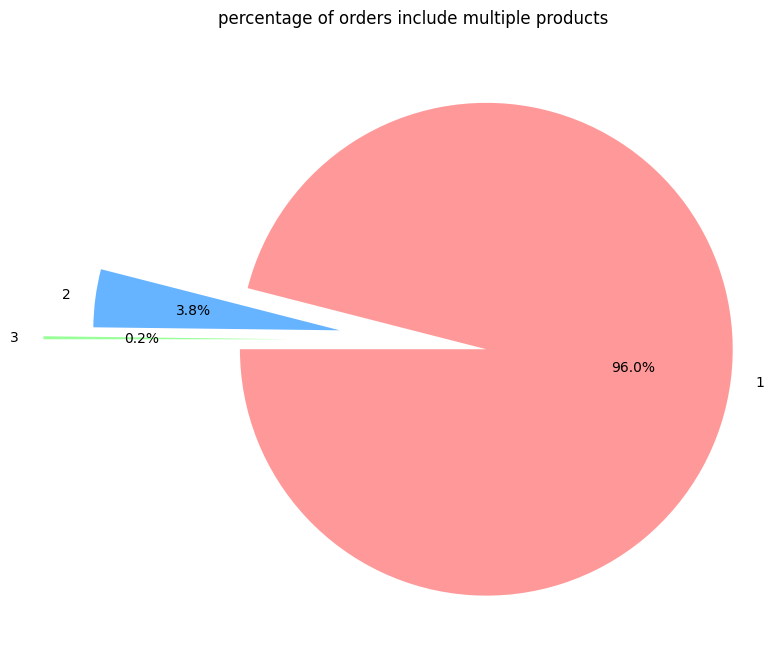

In [ ]:
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = [0.3,0.3,0.5]
plt.figure(figsize=(8, 8))
plt.pie(Products, labels=Products.index, colors=colors, autopct='%1.1f%%', startangle=180,explode = explode)
plt.title("percentage of orders include multiple products")

plt.show()

## What was the highest single-order value?

In [ ]:
data[data['Total'] == max(data['Total'])]

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Total,day,month,hour,Street Address,City,State,Zip
34763,34763,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,3400.0,Monday,April,12.0,731 11th St,New York City,NY,10001
38028,38028,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,3400.0,Saturday,April,21.0,668 Park St,San Francisco,CA,94016
46538,46538,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,3400.0,Monday,May,13.0,643 4th St,Boston,MA,02215
59709,59709,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,3400.0,Saturday,June,9.0,953 Ridge St,San Francisco,CA,94016


# City and Revenue Analysis:


## What city with Highest Revenue ?

In [ ]:
Cities_orders = data.groupby(['City'] , as_index=False).agg({'Order ID' : 'count' ,
                                            'Total':'sum'
                                            })
Cities_orders.rename(columns = {'Order ID':'orders_count'},inplace = True)

In [ ]:
Cities_orders

,City,orders_count,Total
0,Atlanta,13636,2563687.21
1,Austin,9065,1665035.47
2,Boston,18286,3360578.46
3,Dallas,13618,2544998.72
4,Los Angeles,27149,5022588.47
5,New York City,22895,4294119.21
6,Portland,11482,2133675.58
7,San Francisco,41135,7570046.60
8,Seattle,13530,2528242.95


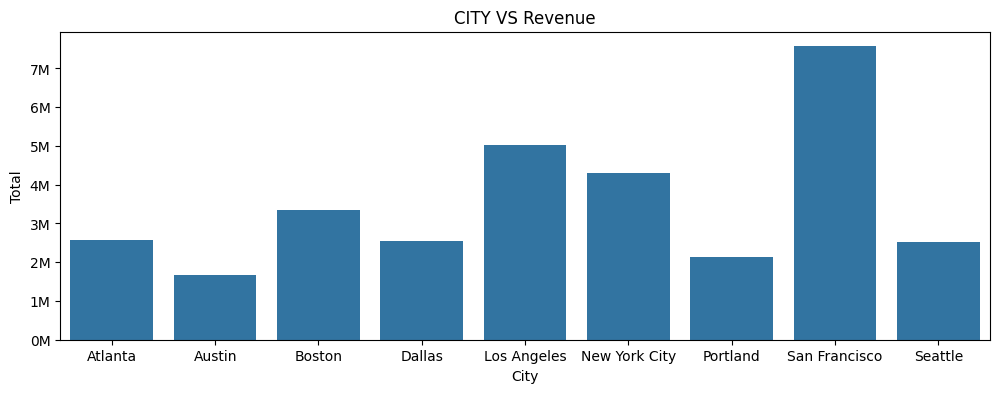

In [ ]:
plt.figure(figsize=(12 , 4))
ax = sns.barplot(data = Cities_orders, x = 'City' , y = 'Total')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M'))
plt.title("CITY VS Revenue")
plt.show()

## What city sold the most products ?

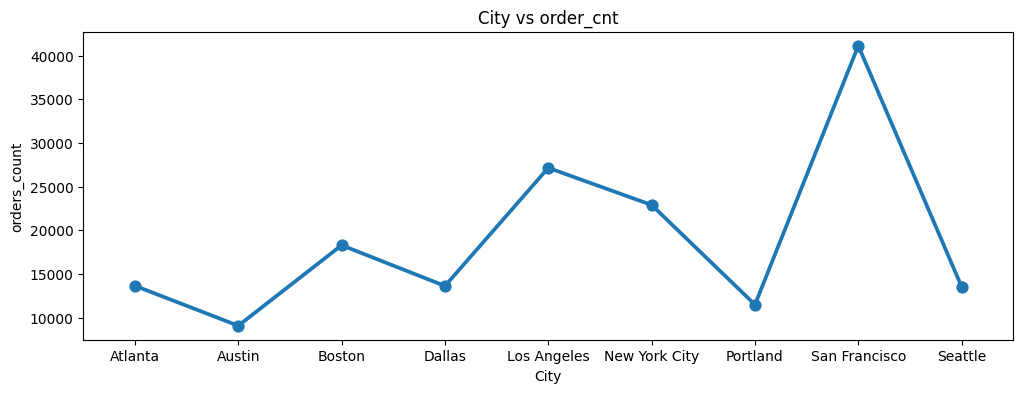

In [ ]:
plt.figure(figsize=(12 , 4))
ax = sns.pointplot(data = Cities_orders, x = 'City' , y = 'orders_count')
plt.title("City vs order_cnt")
plt.show()

# State Analysis:


## What is the distribution of States?



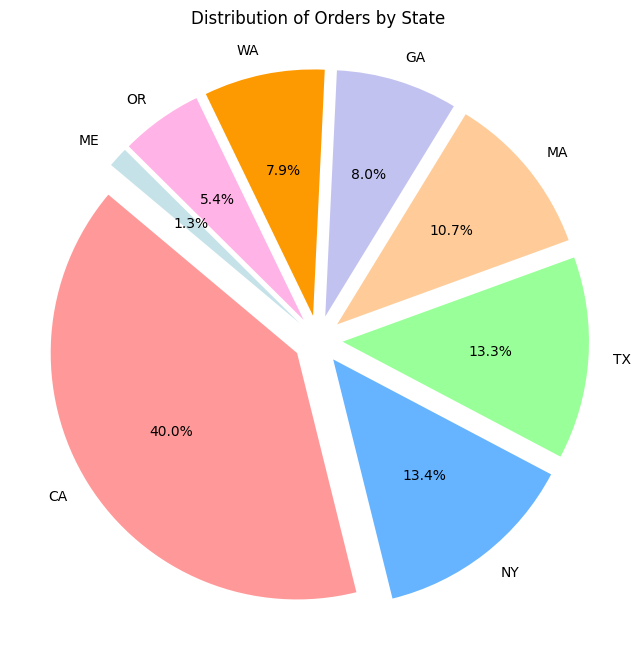

In [ ]:
states = data['State'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0','#fd9901', '#ffb3e6', '#c6e2e9']
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.figure(figsize=(8, 8))
plt.pie(states, labels=states.index, colors=colors, autopct='%1.1f%%', startangle=140,explode = explode)
plt.title("Distribution of Orders by State")

plt.show()

# Task
Analyze the dataset "extra" by performing the following analyses: revenue by hour, top 10 products by revenue, correlation between price and quantity ordered, orders by state, cities with highest average order value, products with highest average price, distribution of order values, and distribution of quantity ordered. Summarize the findings.

## Revenue by hour

### Subtask:
Analyze the total revenue for each hour of the day and visualize the results.


**Reasoning**:
Group the data by hour and calculate the sum of total revenue for each hour.



In [68]:
revenue_by_hour = data.groupby(['hour'], as_index=False)['Total'].sum()
revenue_by_hour

,hour,Total
0,0.0,658327.88
1,1.0,424918.30
2,2.0,215468.56
3,3.0,137288.40
4,4.0,153357.87
5,5.0,213063.79
6,6.0,411004.69
7,7.0,689793.55
8,8.0,1095690.63
9,9.0,1514981.59


**Reasoning**:
Visualize the total revenue by hour using a bar plot.



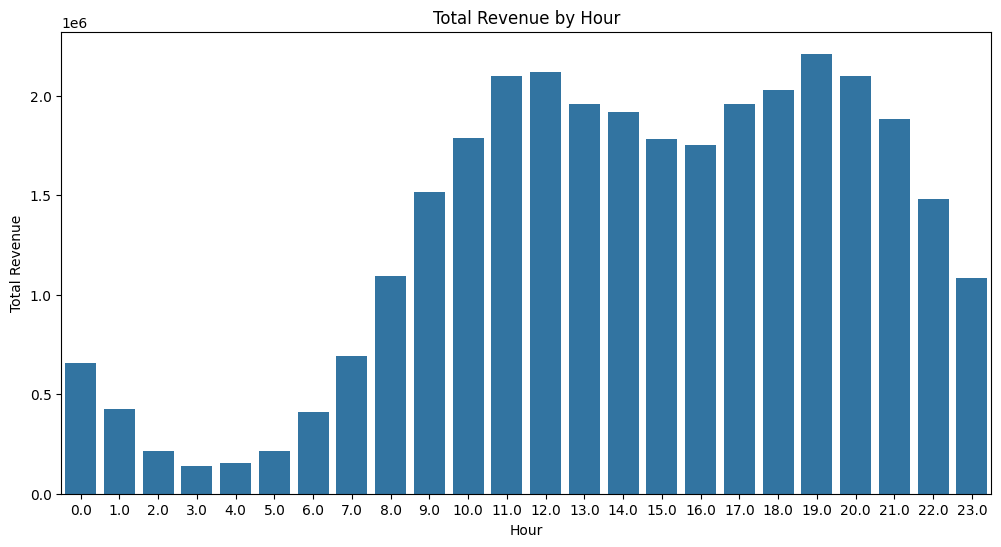

In [69]:
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_hour, x='hour', y='Total')
plt.title('Total Revenue by Hour')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.show()

## Top 10 products by revenue

### Subtask:
Determine the top 10 products based on total revenue and visualize the results.


**Reasoning**:
Group the data by 'Product', calculate the sum of 'Total' for each product, sort in descending order, select the top 10, and visualize the results using a bar plot with appropriate labels and title.



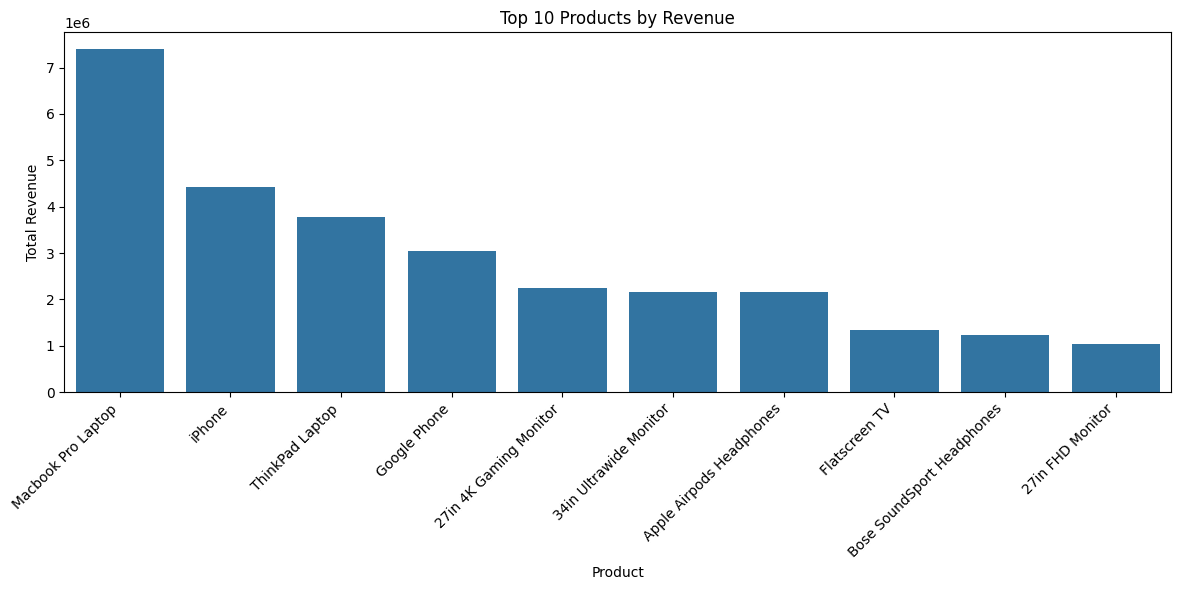

In [70]:
top_10_products = data.groupby('Product', as_index=False)['Total'].sum()
top_10_products = top_10_products.sort_values('Total', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_products, x='Product', y='Total')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Correlation between price and quantity ordered

### Subtask:
Explore the relationship between the price of a product and the quantity ordered.


**Reasoning**:
Create a scatter plot to visualize the relationship between 'Price Each' and 'Quantity Ordered'.



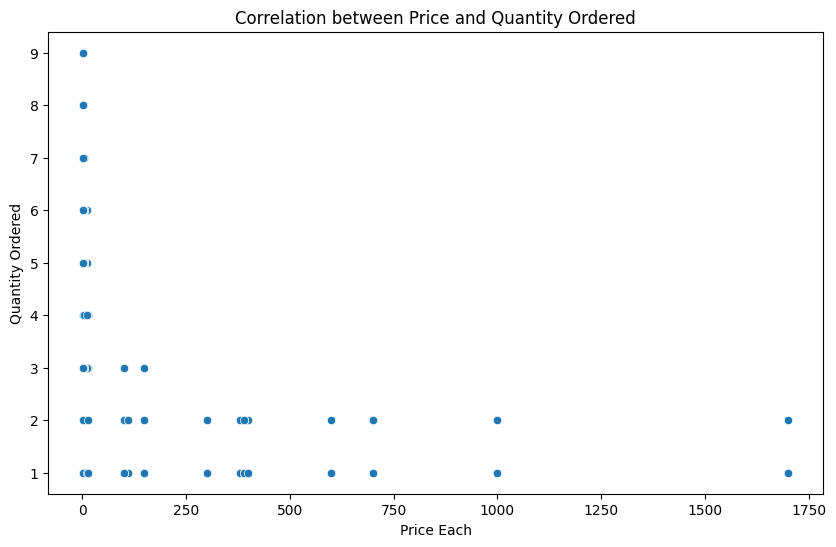

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Price Each', y='Quantity Ordered')
plt.title('Correlation between Price and Quantity Ordered')
plt.xlabel('Price Each')
plt.ylabel('Quantity Ordered')
plt.show()

## Analyze orders by state

### Subtask:
Examine the distribution of orders and revenue across different states.


**Reasoning**:
Group the data by 'State', calculate the count of 'Order ID' and the sum of 'Total', rename the columns, and sort by total revenue.



In [72]:
states_analysis = data.groupby('State', as_index=False).agg(
    order_count=('Order ID', 'count'),
    total_revenue=('Total', 'sum')
)
states_analysis = states_analysis.sort_values('total_revenue', ascending=False)
print(states_analysis)

  State  order_count  total_revenue
0    CA        68284    12592635.07
4    NY        22895     4294119.21
6    TX        22683     4210034.19
2    MA        18286     3360578.46
1    GA        13636     2563687.21
7    WA        13530     2528242.95
5    OR         9215     1714433.60
3    ME         2267      419241.98


**Reasoning**:
Create a bar plot to visualize the total revenue by state and add a title and display the plot.



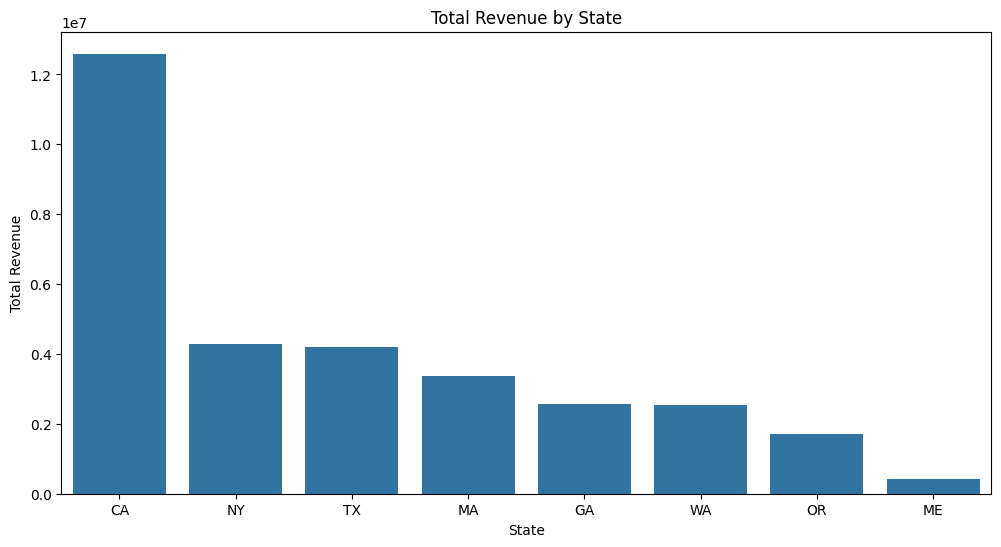

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(data=states_analysis, x='State', y='total_revenue')
plt.title('Total Revenue by State')
plt.xlabel('State')
plt.ylabel('Total Revenue')
plt.show()

## Analyze cities with highest average order value

### Subtask:
Calculate and visualize the average order value for each city.


**Reasoning**:
Calculate the average order value for each city and visualize the results using a bar plot.



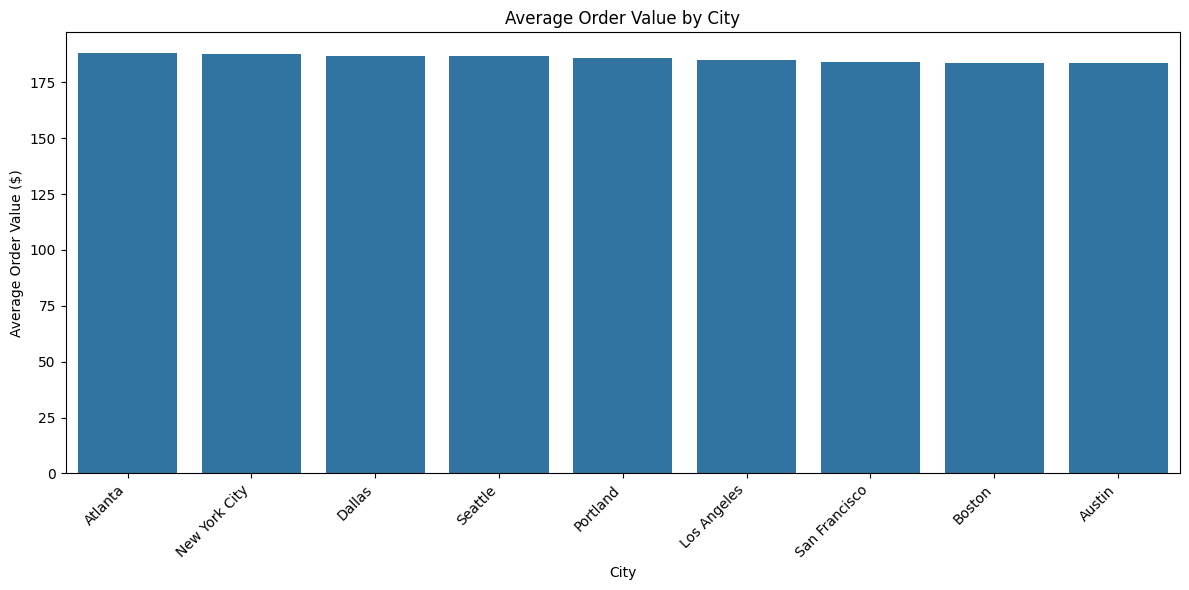

In [74]:
Cities_orders['Average Order Value'] = Cities_orders['Total'] / Cities_orders['orders_count']
Cities_orders_sorted = Cities_orders.sort_values('Average Order Value', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=Cities_orders_sorted, x='City', y='Average Order Value')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x:.0f}'))
plt.title('Average Order Value by City')
plt.xlabel('City')
plt.ylabel('Average Order Value ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze products with highest average price

### Subtask:
Determine and visualize the products with the highest average price.


**Reasoning**:
Group the data by product and calculate the mean price, then sort and select the top 10, and finally visualize the results using a bar plot.



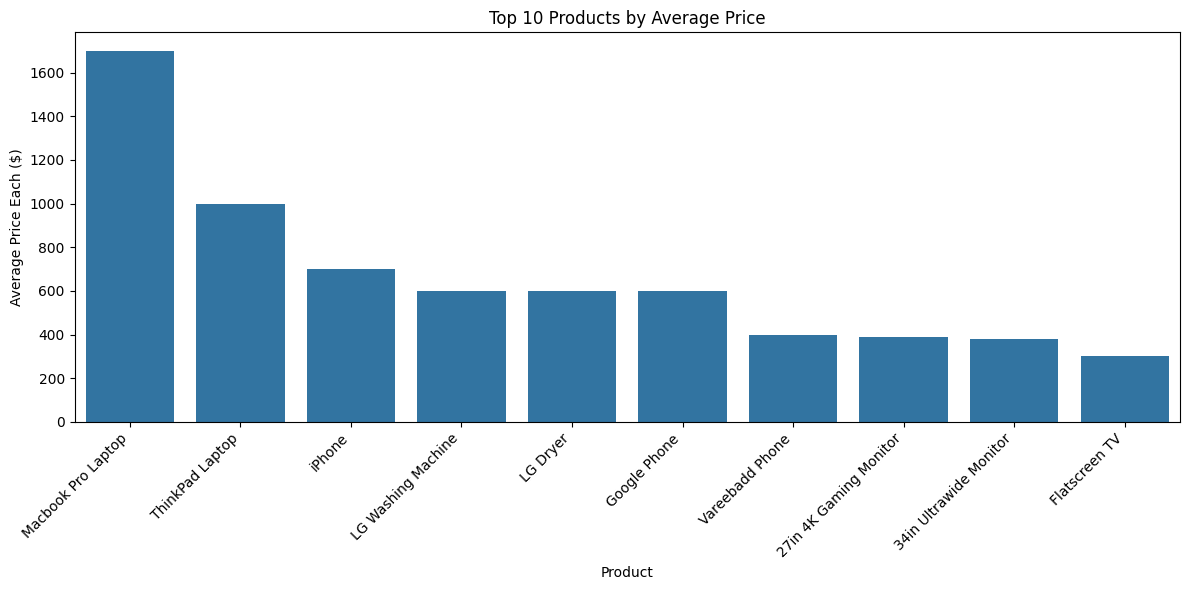

In [75]:
products_avg_price = data.groupby('Product', as_index=False)['Price Each'].mean()
products_avg_price = products_avg_price.sort_values('Price Each', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=products_avg_price, x='Product', y='Price Each')
plt.title('Top 10 Products by Average Price')
plt.xlabel('Product')
plt.ylabel('Average Price Each ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze the distribution of order values

### Subtask:
Visualize the distribution of the total value of orders.


**Reasoning**:
Create a histogram to visualize the distribution of the 'Total' column.



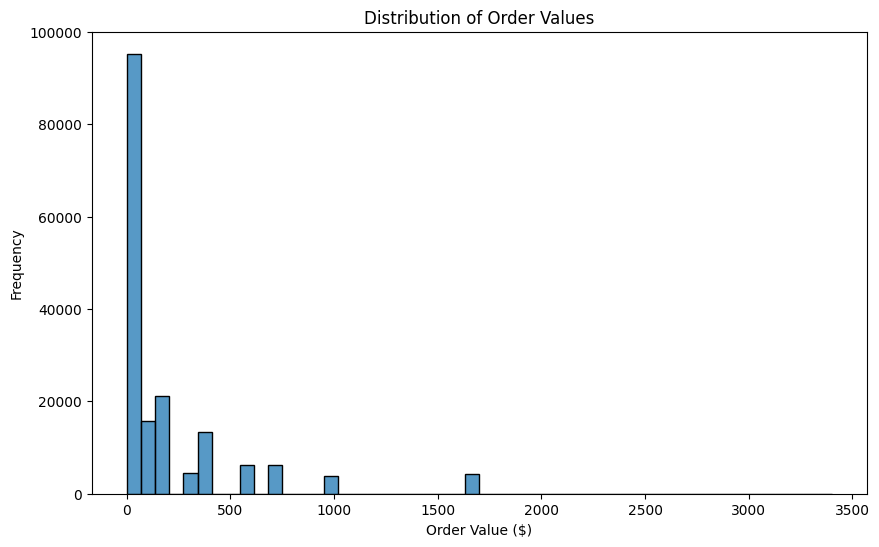

In [76]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Total', bins=50)
plt.title('Distribution of Order Values')
plt.xlabel('Order Value ($)')
plt.ylabel('Frequency')
plt.show()

## Analyze the distribution of quantity ordered

### Subtask:
Visualize the distribution of the quantity of products ordered in each transaction.


**Reasoning**:
Create a histogram to visualize the distribution of the 'Quantity Ordered' column with 20 bins, add a title and axis labels, and display the plot.



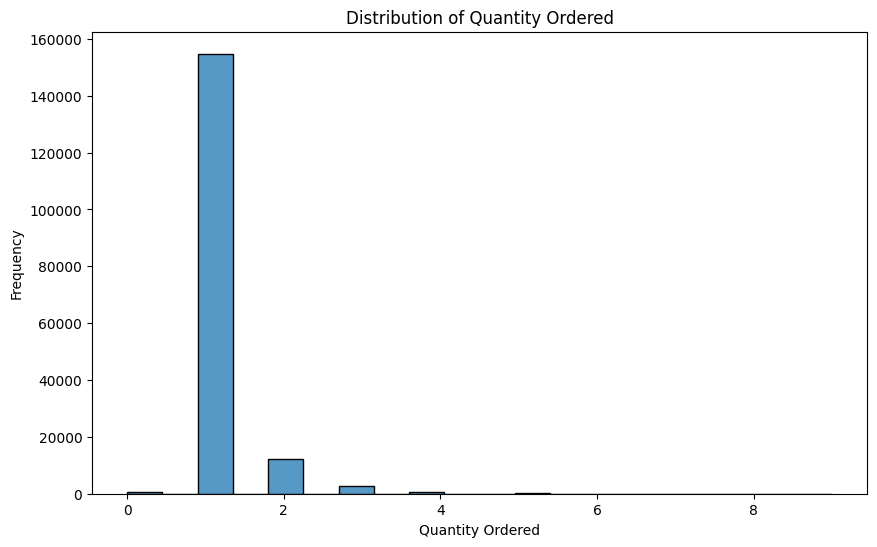

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Quantity Ordered', bins=20)
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Revenue is highest during certain hours of the day, peaking between 10 AM and 8 PM.
*   The top 10 products by revenue contribute significantly to the overall sales.
*   There is a general negative correlation between the price of a product and the quantity ordered, meaning that as the price increases, the quantity ordered tends to decrease.
*   California generates the highest total revenue and has the most orders compared to other states.
*   The average order value varies across different cities.
*   Certain products have a significantly higher average price than others.
*   The distribution of order values is skewed, with a high frequency of lower order values and a decreasing frequency as the order value increases.
*   The distribution of quantity ordered is also skewed, with a high frequency of transactions involving a small quantity of items ordered.

### Insights or Next Steps

*   Identify the specific hours with peak revenue to optimize staffing and marketing efforts.
*   Further investigate the top-performing products to understand their success factors and explore opportunities for promoting similar products.
